In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(color_codes=True)
lf = pd.read_csv('letter-recognition.csv') # Read the csv file
print(lf)

      Letters  x-box  y-box  w-box  h-box  t-pixel  x-bar  y-bar  x2-bar   
0           T      2      8      3      5        1    8.1     13       0  \
1           I      5     12      3      7        2   10.0      5       5   
2           D      4     11      6      8        6   10.0      6       2   
3           N      7     11      6      6        3    5.0      9       4   
4           G      2      1      3      1        1    8.0      6       6   
...       ...    ...    ...    ...    ...      ...    ...    ...     ...   
19995       D      2      2      3      3        2    7.0      7       7   
19996       C      7     10      8      8        4    4.0      8       6   
19997       T      6      9      6      7        5    6.0     11       3   
19998       S      2      3      4      2        1    8.0      7       2   
19999       A      4      9      6      6        2    9.0      5       3   

       y2-bar  xy-bar  x2y-bar  xy2-bar  x-ege  xegvg  y-ege  yegvg   
0           6   

In [93]:
lf.isnull().sum() # Check for null values

Letters            0
x-box              0
y-box              0
w-box              0
h-box              0
t-pixel            0
x-bar              0
y-bar              0
x2-bar             0
y2-bar             0
xy-bar             0
x2y-bar            0
xy2-bar            0
x-ege              0
xegvg              0
y-ege              0
yegvg              0
Unnamed: 17    20000
Unnamed: 18    20000
dtype: int64

In [94]:
# # Convert the 'Letters' column to numerical labels
lf['Letters'] = lf['Letters'].apply(lambda ch: ord(ch) - ord('A'))

lf = lf.drop(columns=['Unnamed: 17', 'Unnamed: 18'])

lf

,Letters,x-box,y-box,w-box,h-box,t-pixel,x-bar,y-bar,x2-bar,y2-bar,xy-bar,x2y-bar,xy2-bar,x-ege,xegvg,y-ege,yegvg
0,19,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
1,8,5,12,3,7,2,10.0,5,5,4,13.0,3,9.0,2.0,8.0,4.0,10.0
2,3,4,11,6,8,6,10.0,6,2,6,10.0,3,7.0,3.0,7.0,3.0,9.0
3,13,7,11,6,6,3,5.0,9,4,6,4.0,4,10.0,6.0,10.0,2.0,8.0
4,6,2,1,3,1,1,8.0,6,6,6,6.0,5,9.0,1.0,7.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7.0,7,7,6,6.0,6,4.0,2.0,8.0,3.0,7.0
19996,2,7,10,8,8,4,4.0,8,6,9,12.0,9,13.0,2.0,9.0,3.0,7.0
19997,19,6,9,6,7,5,6.0,11,3,7,11.0,9,5.0,2.0,12.0,2.0,4.0
19998,18,2,3,4,2,1,8.0,7,2,6,10.0,6,8.0,1.0,9.0,5.0,8.0


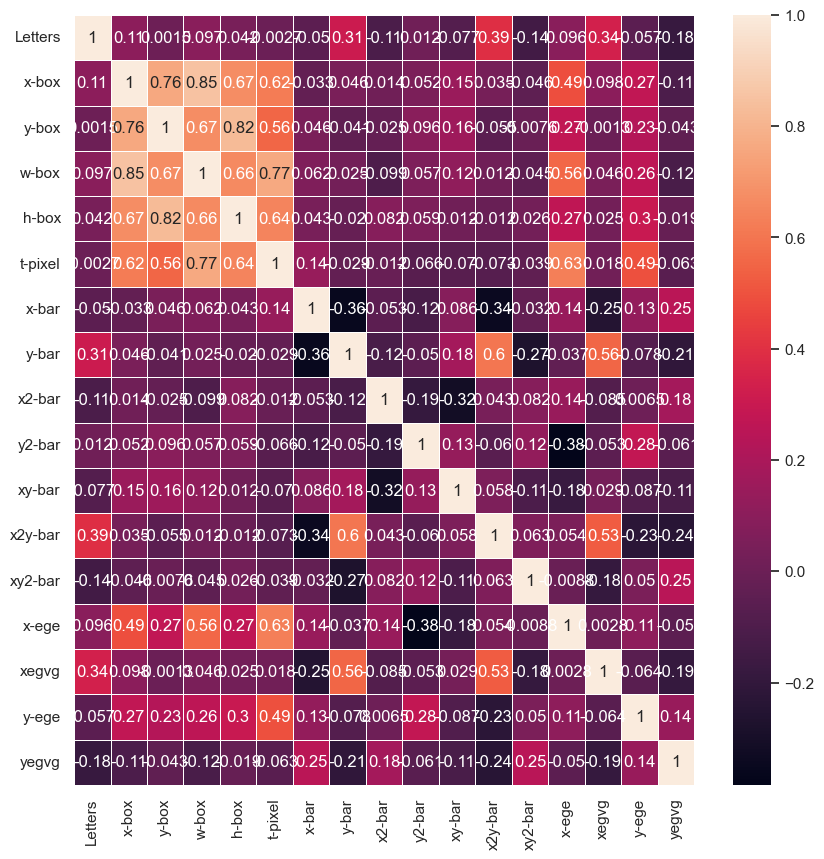

In [95]:
plt.subplots(figsize=(10, 10))
dataplot = sns.heatmap(lf.corr(), annot=True, linewidths=0.5)

<Axes: >

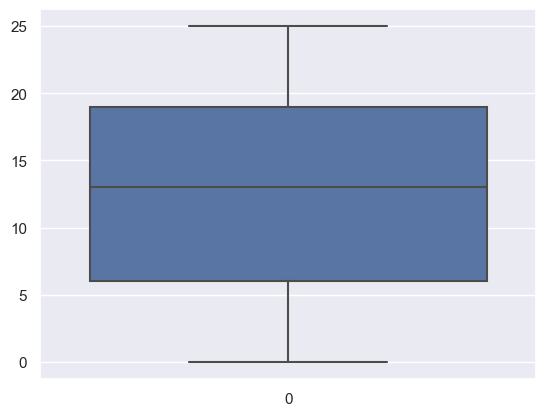

In [96]:
sns.boxplot(lf['Letters'])

<Axes: >

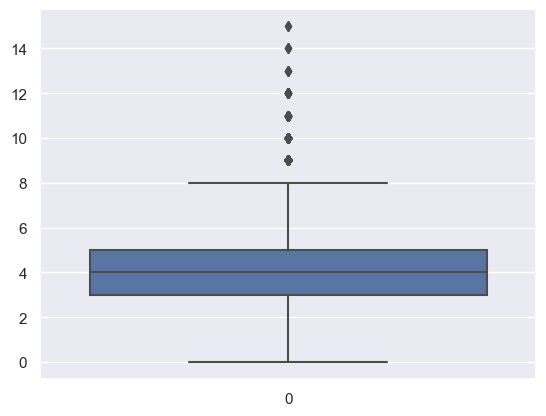

In [97]:
sns.boxplot(lf['x-box'])

In [98]:
import scipy.stats as stats

stats.zscore(lf)
z=np.abs(stats.zscore(lf))
print(z)


        Letters     x-box     y-box     w-box     h-box   t-pixel     x-bar   
0      0.864204  1.057698  0.291877  1.053277  0.164704  1.144013  0.593486  \
1      0.602074  0.510385  1.502358  1.053277  0.719730  0.687476  1.531300   
2      1.268564  0.012309  1.199738  0.435910  1.161947  1.138672  1.531300   
3      0.064416  1.555774  1.199738  0.435910  0.277513  0.230939  0.936632   
4      0.868670  1.057698  1.826464  1.053277  1.933571  1.144013  0.544127   
...         ...       ...       ...       ...       ...       ...       ...   
19995  1.268564  1.057698  1.523844  1.053277  1.049137  0.687476  0.050541   
19996  1.401862  1.555774  0.897117  1.428701  1.161947  0.225598  1.430219   
19997  0.864204  1.033079  0.594497  0.435910  0.719730  0.682135  0.443046   
19998  0.730906  1.057698  1.221224  0.556881  1.491354  1.144013  0.544127   
19999  1.668458  0.012309  0.594497  0.435910  0.277513  0.687476  1.037714   

          y-bar    x2-bar    y2-bar    xy-bar   x2y

In [99]:
data_clean = lf[(z < 3).all(axis=1)]
print(data_clean.shape)

(18264, 17)


In [100]:
# X = data_clean.values[:,0:16]
# Y = data_clean.values[:,16]

# print(X)
# print(Y)

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

x = lf.iloc[:, 0:16].values # independent variable
y = lf[['Letters']].values.flatten() # dependent variable


In [101]:
x.shape

(20000, 16)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(x,y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [103]:
print(rf.predict(X_test))
print(Y_test)

[11  7 24 ... 25 15 22]
[11  7 24 ... 25 15 22]


In [104]:
print(rf.score(X_test, Y_test)*100,"% accuracy")

99.375 % accuracy
